In [4]:
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import zscore
import scipy.cluster.hierarchy as ch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = None

CPU times: user 13 μs, sys: 0 ns, total: 13 μs
Wall time: 21.5 μs


In [6]:
df = pd.read_csv("../data_cleaned/cleaned_dataset_no_zeros.csv")
df.head(20)

,Acidity,Aftertaste,Aroma,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean.Cup,Color,Country.of.Origin,Cupper.Points,Flavor,Moisture,Processing.Method,Quakers,Species,Sweetness,Total.Cup.Points,Uniformity,Variety
0,8.75,8.67,8.67,8.42,8.50,0,0,10.0,Green,Ethiopia,8.75,8.83,0.12,Washed / Wet,0.0,Arabica,10.00,90.58,10.00,Caturra
1,8.58,8.50,8.75,8.42,8.42,0,1,10.0,Green,Ethiopia,8.58,8.67,0.12,Washed / Wet,0.0,Arabica,10.00,89.92,10.00,Other
2,8.42,8.42,8.42,8.42,8.33,0,0,10.0,Green,Guatemala,9.25,8.50,0.11,Washed / Wet,0.0,Arabica,10.00,89.75,10.00,Bourbon
3,8.42,8.42,8.17,8.25,8.50,0,2,10.0,Green,Ethiopia,8.67,8.58,0.11,Natural / Dry,0.0,Arabica,10.00,89.00,10.00,Caturra
4,8.50,8.25,8.25,8.33,8.42,0,2,10.0,Green,Ethiopia,8.58,8.50,0.12,Washed / Wet,0.0,Arabica,10.00,88.83,10.00,Other
5,8.42,8.50,8.25,8.50,8.33,0,0,10.0,Green,Ethiopia,9.00,8.33,0.03,Washed / Wet,0.0,Arabica,9.33,88.67,10.00,Caturra
6,8.42,8.58,8.67,8.42,8.33,0,0,10.0,Green,Ethiopia,8.67,8.67,0.03,Washed / Wet,0.0,Arabica,9.33,88.42,9.33,Caturra
7,8.50,8.50,8.08,8.42,7.67,0,4,10.0,Green,Ethiopia,8.50,8.58,0.10,Natural / Dry,0.0,Arabica,10.00,88.25,10.00,Other
8,8.50,8.25,8.17,8.17,7.75,0,1,10.0,Green,Ethiopia,8.58,8.67,0.10,Natural / Dry,0.0,Arabica,10.00,88.08,10.00,Caturra
9,8.33,8.17,8.25,8.17,8.08,0,0,10.0,Green,United States,8.50,8.42,0.11,Washed / Wet,0.0,Arabica,10.00,87.92,10.00,Other


In [7]:
df.columns

Index(['Acidity', 'Aftertaste', 'Aroma', 'Balance', 'Body',
       'Category.One.Defects', 'Category.Two.Defects', 'Clean.Cup', 'Color',
       'Country.of.Origin', 'Cupper.Points', 'Flavor', 'Moisture',
       'Processing.Method', 'Quakers', 'Species', 'Sweetness',
       'Total.Cup.Points', 'Uniformity', 'Variety'],
      dtype='object')

## Data Cleaning
Let's drop columns we know are unescessay. But keeps columns that mmight have categorial value. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Acidity               1104 non-null   float64
 1   Aftertaste            1104 non-null   float64
 2   Aroma                 1104 non-null   float64
 3   Balance               1104 non-null   float64
 4   Body                  1104 non-null   float64
 5   Category.One.Defects  1104 non-null   int64  
 6   Category.Two.Defects  1104 non-null   int64  
 7   Clean.Cup             1104 non-null   float64
 8   Color                 1104 non-null   object 
 9   Country.of.Origin     1104 non-null   object 
 10  Cupper.Points         1104 non-null   float64
 11  Flavor                1104 non-null   float64
 12  Moisture              1104 non-null   float64
 13  Processing.Method     1104 non-null   object 
 14  Quakers               1104 non-null   float64
 15  Species              

In [11]:
df.isna().sum()

Acidity                 0
Aftertaste              0
Aroma                   0
Balance                 0
Body                    0
Category.One.Defects    0
Category.Two.Defects    0
Clean.Cup               0
Color                   0
Country.of.Origin       0
Cupper.Points           0
Flavor                  0
Moisture                0
Processing.Method       0
Quakers                 0
Species                 0
Sweetness               0
Total.Cup.Points        0
Uniformity              0
Variety                 0
dtype: int64

In [12]:
df.describe()

,Acidity,Aftertaste,Aroma,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean.Cup,Cupper.Points,Flavor,Moisture,Quakers,Sweetness,Total.Cup.Points,Uniformity
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,7.535707,7.401513,7.578370,7.512654,7.513641,0.368659,3.529891,9.869484,7.496051,7.527871,0.110888,0.135870,9.882844,82.186178,9.876938
std,0.313052,0.339911,0.309041,0.353861,0.289336,1.852434,5.267032,0.662653,0.413486,0.331121,0.017817,0.716101,0.523479,2.628470,0.429075
min,5.250000,6.170000,5.080000,5.250000,5.170000,0.000000,0.000000,1.330000,5.170000,6.170000,0.010000,0.000000,1.330000,59.830000,6.000000
25%,7.330000,7.250000,7.420000,7.330000,7.330000,0.000000,0.000000,10.000000,7.250000,7.330000,0.110000,0.000000,10.000000,81.230000,10.000000
50%,7.500000,7.420000,7.580000,7.500000,7.500000,0.000000,2.000000,10.000000,7.500000,7.580000,0.110000,0.000000,10.000000,82.500000,10.000000
75%,7.750000,7.580000,7.750000,7.750000,7.670000,0.000000,4.000000,10.000000,7.750000,7.750000,0.120000,0.000000,10.000000,83.580000,10.000000
max,8.750000,8.670000,8.750000,8.750000,8.580000,31.000000,47.000000,10.000000,10.000000,8.830000,0.200000,11.000000,10.000000,90.580000,10.000000


In [13]:
fig = plt.figure()
df.altitude_mean_meters.plot.box()

AttributeError: 'DataFrame' object has no attribute 'altitude_mean_meters'

<Figure size 640x480 with 0 Axes>

Too keep maximal information we fill out the missing values with mean values and modes for nominal data. We might change this for model optimization

In [11]:
df = df.fillna({'Variety': df['Variety'].mode()[0]})
df = df.fillna({'Processing.Method': df['Processing.Method'].mode()[0]})
df = df.fillna({'Color': df['Color'].mode()[0]})
df = df.fillna({'altitude_mean_meters': df['altitude_mean_meters'].median()})

In [12]:
df.isna().sum()

Species                 0
Country.of.Origin       1
Variety                 0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 1
Color                   0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

In [13]:
# Remove rows with missing quakers or country
df = df.dropna(how='any')

In [14]:
df.isna().sum()

Species                 0
Country.of.Origin       0
Variety                 0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

In [15]:
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,7.567307,7.520890,7.401683,7.536073,7.517405,7.517853,9.834630,9.834862,9.856477,7.503508,82.091047,0.088355,0.480180,0.173523,3.557966,1695.508926
std,0.377181,0.398161,0.403845,0.379575,0.370333,0.409200,0.554969,0.764491,0.616538,0.473763,3.502014,0.048319,2.551524,0.832419,5.316323,7896.300059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1200.000000
50%,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1550.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000


<Axes: >

<Figure size 640x480 with 0 Axes>

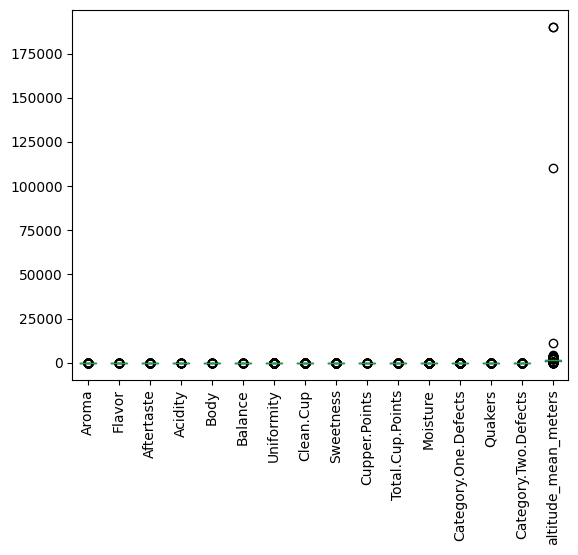

In [16]:
fig = plt.figure()
df.plot.box(rot=90)

<Axes: >

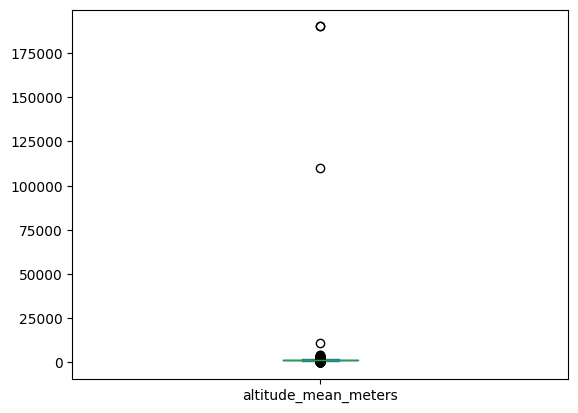

In [17]:
df['altitude_mean_meters'].plot.box()

In [18]:
# We'll remove the outlying rows based on z-score
df = df[np.abs(zscore(df['altitude_mean_meters'])) < 2.5]

<Axes: >

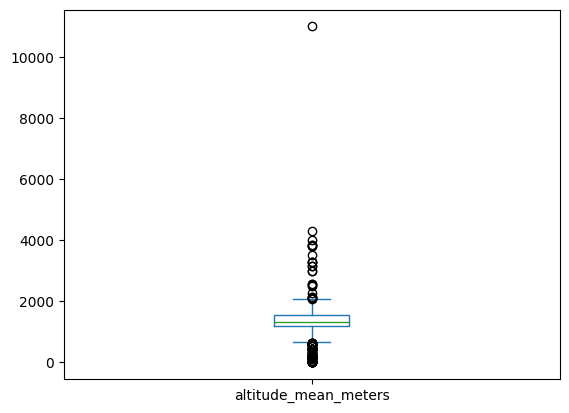

In [19]:
df['altitude_mean_meters'].plot.box()

<Axes: >

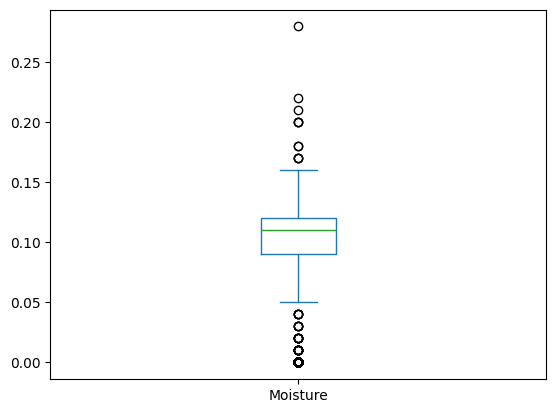

In [20]:
df['Moisture'].plot.box()

<Axes: ylabel='Frequency'>

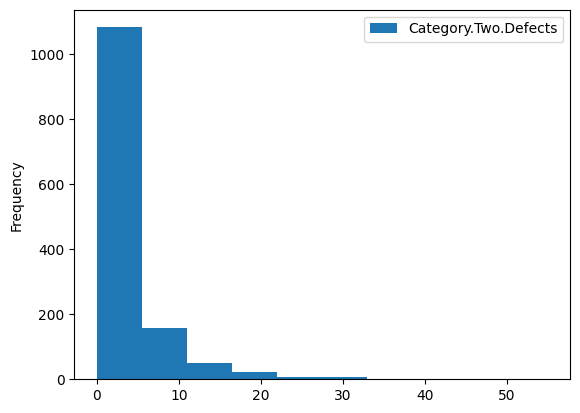

In [21]:
df[['Category.Two.Defects']].plot.hist()

<Axes: ylabel='Frequency'>

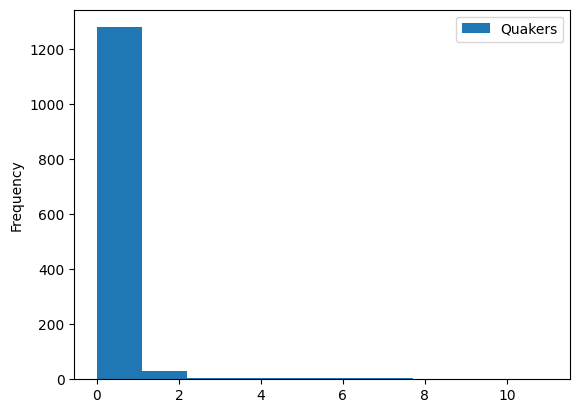

In [22]:
# we're gonna keep these outlying values, as they might have a high impact on the quality score
df[['Quakers']].plot.hist()

## Data Exploration

A mixed bag! It seems like especially African countries is found in the top half
Lets find out hoW the features contribute to the Total Cup Score:

In [23]:
# lets see which countries can boast the highest cup grades
df.groupby('Country.of.Origin')['Total.Cup.Points'].mean().reset_index().sort_values(by='Total.Cup.Points', ascending=False)

,Country.of.Origin,Total.Cup.Points
23,Papua New Guinea,85.750000
8,Ethiopia,85.484091
14,Japan,84.670000
31,United States,84.433000
15,Kenya,84.309600
22,Panama,83.707500
30,Uganda,83.451944
3,Colombia,83.104396
7,El Salvador,83.052857
2,China,82.927500


Seems like a mixed bag from around the world. There seems to bare a small majority of african countries in the top half


<Axes: xlabel='Species'>

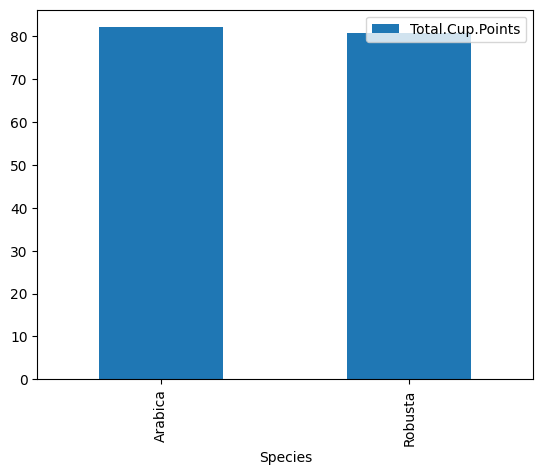

In [24]:
df.groupby('Species')['Total.Cup.Points'].mean().reset_index().sort_values(by='Total.Cup.Points', ascending=False).plot.bar(x='Species')

Surprinsingly, The Robusta species does not seem to have a much lower average score than Arabica, which we thought were far superior in taste

In [25]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
Aroma,1.000000,0.812638,0.776179,0.722760,0.674379,0.709721,0.368136,0.336919,0.254585,0.687628,0.791953,-0.133450,-0.097060,0.009238,-0.149636,0.079180
Flavor,0.812638,1.000000,0.895429,0.816159,0.736922,0.793231,0.412178,0.397993,0.291929,0.793569,0.874532,-0.144780,-0.089334,0.005616,-0.192489,0.093214
Aftertaste,0.776179,0.895429,1.000000,0.791769,0.736195,0.811241,0.403210,0.388155,0.267566,0.785996,0.861328,-0.180045,-0.105536,0.001764,-0.211162,0.088460
Acidity,0.722760,0.816159,0.791769,1.000000,0.707662,0.733812,0.376720,0.301893,0.262823,0.698450,0.797244,-0.128805,-0.084698,-0.014671,-0.136957,0.124991
Body,0.674379,0.736922,0.736195,0.707662,1.000000,0.757572,0.326854,0.276537,0.268253,0.633184,0.757407,-0.147369,-0.044665,-0.002568,-0.085595,0.092546
Balance,0.709721,0.793231,0.811241,0.733812,0.757572,1.000000,0.401214,0.370546,0.283431,0.721150,0.828732,-0.199599,-0.082560,0.008430,-0.171283,0.099886
Uniformity,0.368136,0.412178,0.403210,0.376720,0.326854,0.401214,1.000000,0.525932,0.450653,0.359780,0.656882,0.013523,-0.105904,0.030970,-0.146094,0.034200
Clean.Cup,0.336919,0.397993,0.388155,0.301893,0.276537,0.370546,0.525932,1.000000,0.440330,0.357111,0.659216,-0.015130,-0.115600,0.027977,-0.232977,0.042372
Sweetness,0.254585,0.291929,0.267566,0.262823,0.268253,0.283431,0.450653,0.440330,1.000000,0.216270,0.554284,0.072563,-0.150863,0.011813,-0.025184,0.003916
Cupper.Points,0.687628,0.793569,0.785996,0.698450,0.633184,0.721150,0.359780,0.357111,0.216270,1.000000,0.790102,-0.181704,-0.030310,0.011098,-0.192049,0.075902


<Axes: >

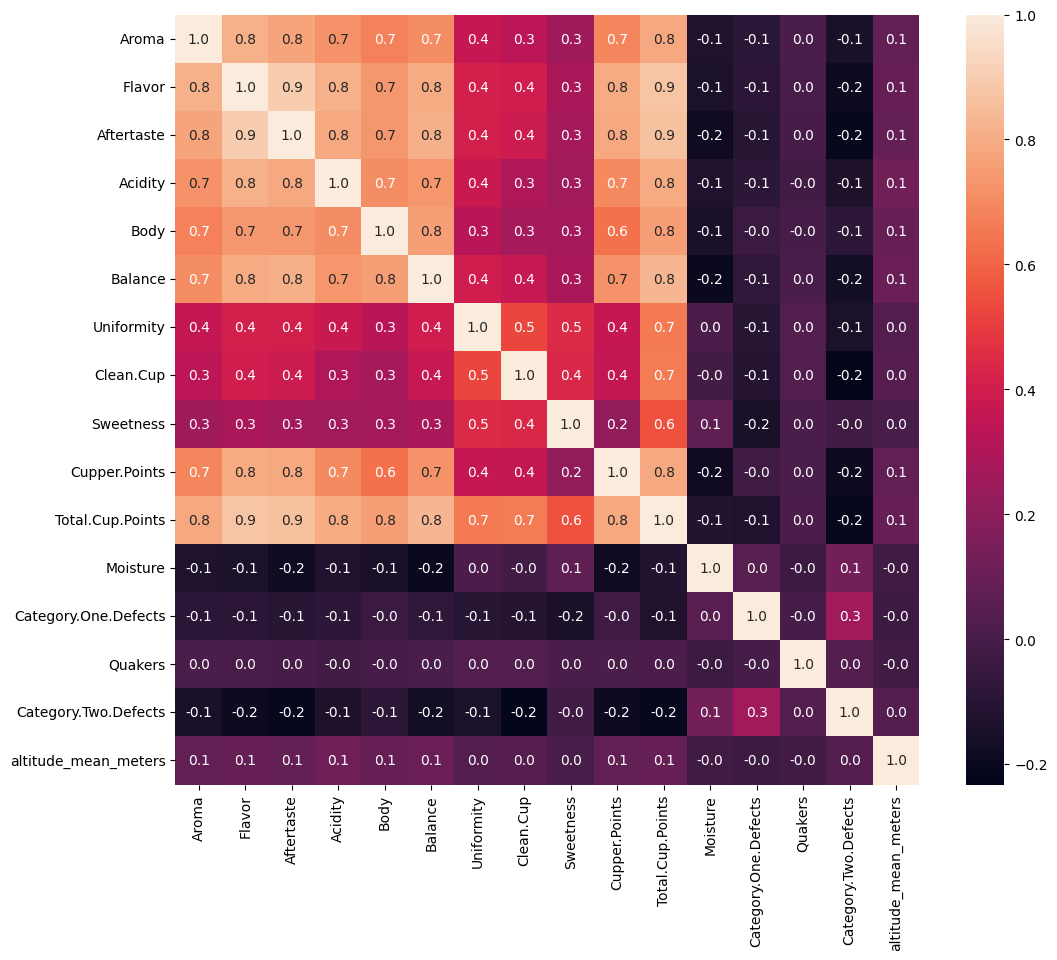

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot = True, fmt = ".1f")

Okay, so unsurprisingly the different flavor parameters seems to correlate a lot with the Total Cup Points, but also with each other. It seems that the main parameters that drags down the score is the amount of Category One and Two Defects, which we also suspected. Quakers doesn't seem to have a big impact on the overall Cup Point score

In [27]:
df.dtypes

Species                  object
Country.of.Origin        object
Variety                  object
Processing.Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean.Cup               float64
Sweetness               float64
Cupper.Points           float64
Total.Cup.Points        float64
Moisture                float64
Category.One.Defects      int64
Quakers                 float64
Color                    object
Category.Two.Defects      int64
altitude_mean_meters    float64
dtype: object

Lets label encode the categorical data, so we can see how that affects the correlation score as well

In [28]:
le = LabelEncoder()
cols_to_enc = df.select_dtypes(include='object').columns
enc_df = df.copy()

for col in cols_to_enc:
    enc_df[col] = le.fit_transform(df[col]).astype(int)

enc_df


,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
0,0,8,5,4,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,2,0,2075.00
1,0,8,15,4,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,2,1,2075.00
2,0,9,2,4,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,2,0,1700.00
3,0,8,5,0,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,2,2,2000.00
4,0,8,15,4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,2,2,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1,6,5,4,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,0,1,1310.64
1335,1,6,5,4,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,0,0,40.00
1336,1,31,5,0,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,2,6,795.00
1337,1,12,5,0,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,2,1,1310.64


In [29]:
# lets see how much variance it give us
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,7.567706,7.521244,7.402211,7.536282,7.517759,7.518268,9.834760,9.834993,9.856657,7.503951,82.094190,0.088298,0.481259,0.170915,3.561469,1331.759696
std,0.377478,0.398521,0.404132,0.379918,0.370669,0.409553,0.555384,0.765199,0.617038,0.474189,3.505144,0.048357,2.554291,0.826707,5.320801,515.741486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1200.000000
50%,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000
75%,7.750000,7.750000,7.647500,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1550.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,11000.000000


In [30]:
df.groupby('Country.of.Origin')['Total.Cup.Points'].mean().reset_index().sort_values(by='Total.Cup.Points', ascending=False)

,Country.of.Origin,Total.Cup.Points
23,Papua New Guinea,85.750000
8,Ethiopia,85.484091
14,Japan,84.670000
31,United States,84.433000
15,Kenya,84.309600
22,Panama,83.707500
30,Uganda,83.451944
3,Colombia,83.104396
7,El Salvador,83.052857
2,China,82.927500


<Axes: xlabel='Country.of.Origin', ylabel='Count'>

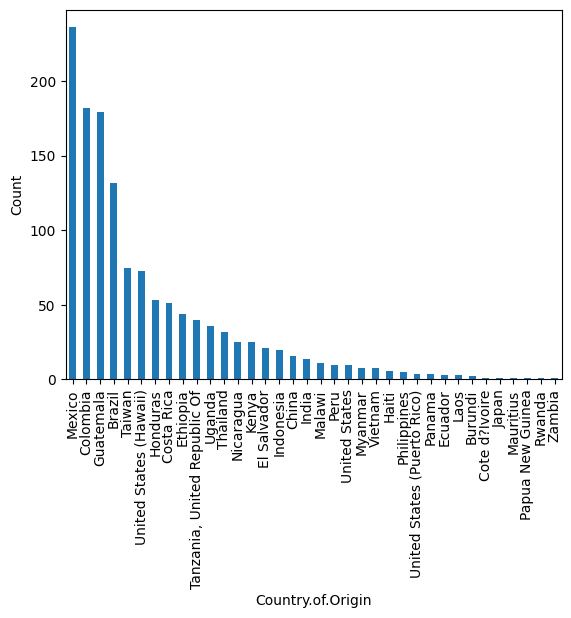

In [31]:
df.groupby('Country.of.Origin').size().sort_values(ascending=False).plot.bar(ylabel='Count')

<Axes: >

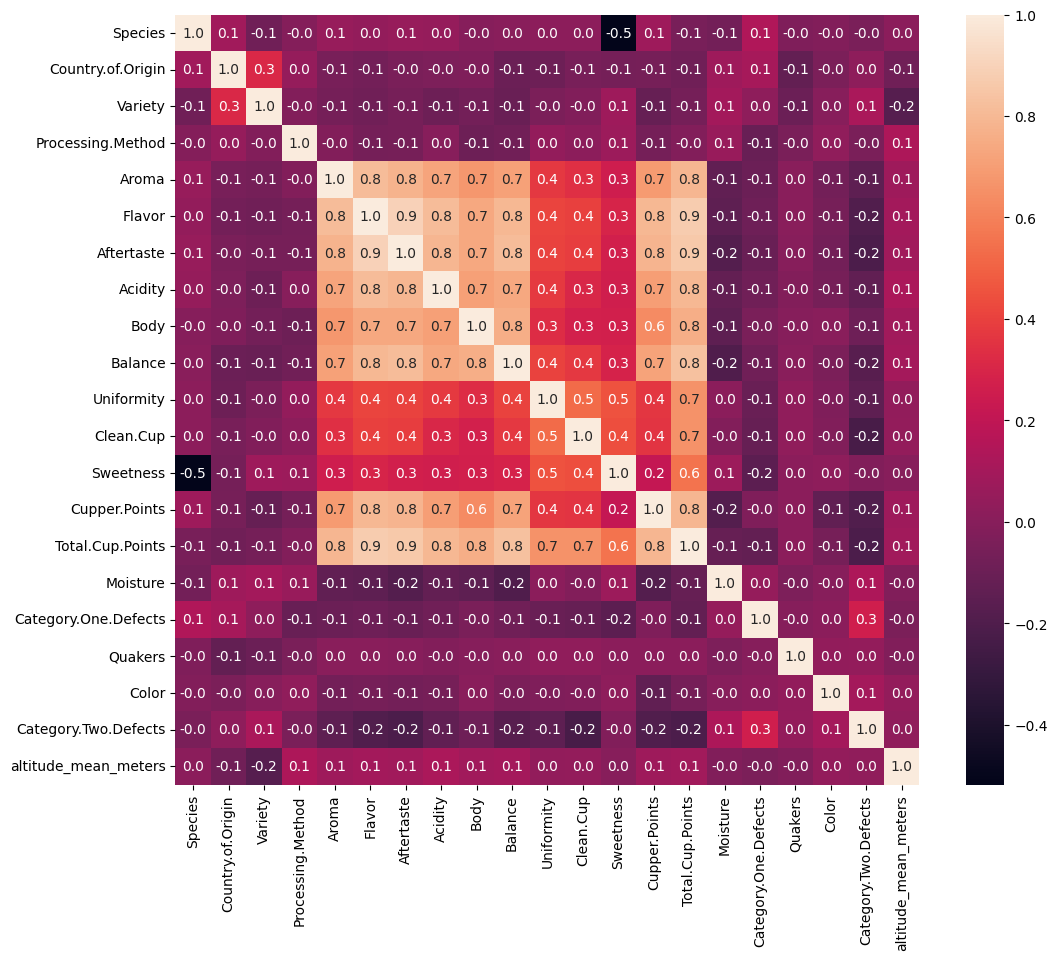

In [32]:
enc_corr_mat = enc_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(enc_corr_mat, annot = True, fmt = ".1f")

The species of the coffee seems to have a significant impact of the sweetnes of the coffee

<Axes: xlabel='Species'>

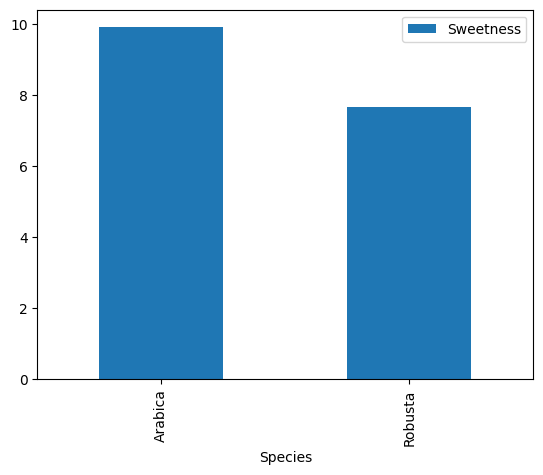

In [33]:
# Sweetnes grouped by species
df.groupby('Species')['Sweetness'].mean().reset_index().plot.bar(x='Species')

<Axes: xlabel='Country.of.Origin'>

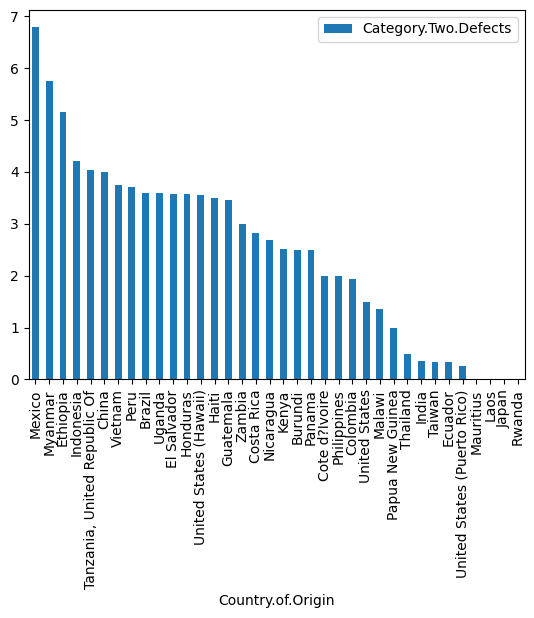

In [34]:
df.groupby('Country.of.Origin')['Category.Two.Defects'].mean().reset_index().sort_values(by='Category.Two.Defects', ascending=False).plot.bar(x='Country.of.Origin')

<Axes: xlabel='Country.of.Origin'>

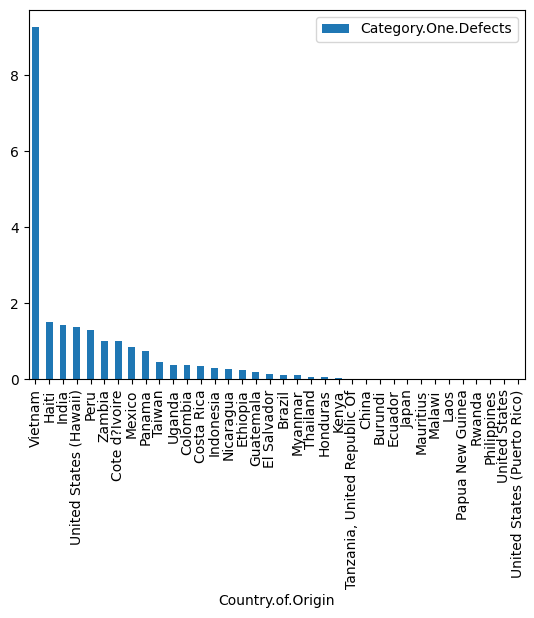

In [35]:
df.groupby('Country.of.Origin')['Category.One.Defects'].mean().reset_index().sort_values(by='Category.One.Defects', ascending=False).plot.bar(x='Country.of.Origin')



Interestingly though, we also find Ethiopia among the countries with the highest mean in Category 2 defect parameters, even though it is the country with the averagely highest scoring coffee.
This indicates that it takes rather large amounts of defects in the coffee to really make an impact on the overall score.

## Clustering model training

We'll try to extract more information with clustering models. For this purpose we drop our previous target feature "Total Cup Points" and scale the feature values in the dataset, so we can do a principal component analysis

In [36]:
# df_cls = enc_df.drop('Total Cup Points', axis=1)
df_cls = enc_df.copy()

In [37]:
df_cls[df_cls.columns] = sk.preprocessing.StandardScaler().fit_transform(df_cls)

In [38]:
df_cls.sample(5)

,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
516,-0.146422,-1.056808,-0.598992,-1.943363,0.032581,0.574227,0.044033,0.352098,0.167979,-0.240031,0.297635,0.215721,0.232396,0.160438,0.258520,-1.826668,-0.188483,-0.206819,0.391965,-0.293575,-0.643509
491,-0.146422,1.755579,-0.166953,0.560207,-0.629957,0.147490,0.440092,1.010382,0.410875,0.150786,0.297635,0.215721,0.232396,-0.177107,0.281352,0.655826,-0.188483,-0.206819,0.391965,-0.669599,-0.040966
868,-0.146422,-1.056808,-0.598992,0.560207,-0.629957,-0.254146,-0.178750,-0.543168,-0.047928,0.370620,0.297635,0.215721,0.232396,-0.704521,-0.098233,-1.826668,-0.188483,-0.206819,0.391965,-0.481587,0.811254
758,-0.146422,0.688812,-0.598992,0.560207,-0.179432,-0.053328,-0.178750,-0.306186,-0.047928,-0.240031,0.297635,0.215721,0.232396,-0.008334,0.021636,0.242077,-0.188483,-0.206819,0.391965,-0.481587,-0.643509
814,-0.146422,-1.056808,-0.598992,0.560207,-0.629957,-1.308438,-0.797592,-0.306186,-0.047928,0.370620,0.297635,0.215721,0.232396,1.046494,-0.026882,-0.378546,-0.188483,-0.206819,0.391965,-0.293575,0.859746


In [39]:
pca = PCA()
pca.fit(df_cls)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# 3 principal components
cumulative_variance[2]

np.float64(0.49855121278467157)

/tmp/ipykernel_11257/3103998374.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


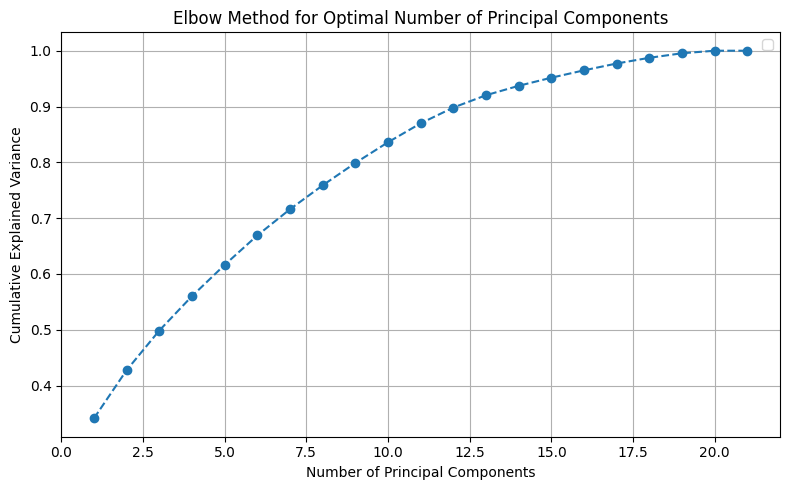

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Not as much as we hoped for. For 3 principal components, we get just above 50% explained variance, which is not a lot. Lets try and extract high correlating features and do the PCA again

In [41]:
df_cls_ext = enc_df[["Aroma","Flavor","Acidity","Body","Balance","Aftertaste","Uniformity", "Sweetness"]].copy()
df_cls_ext[df_cls_ext.columns] = sk.preprocessing.StandardScaler().fit_transform(df_cls_ext)

In [42]:
pca = PCA()
pca.fit(df_cls_ext)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# 3 principal components
cumulative_variance[2]

np.float64(0.8548158101346888)

/tmp/ipykernel_11257/3103998374.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


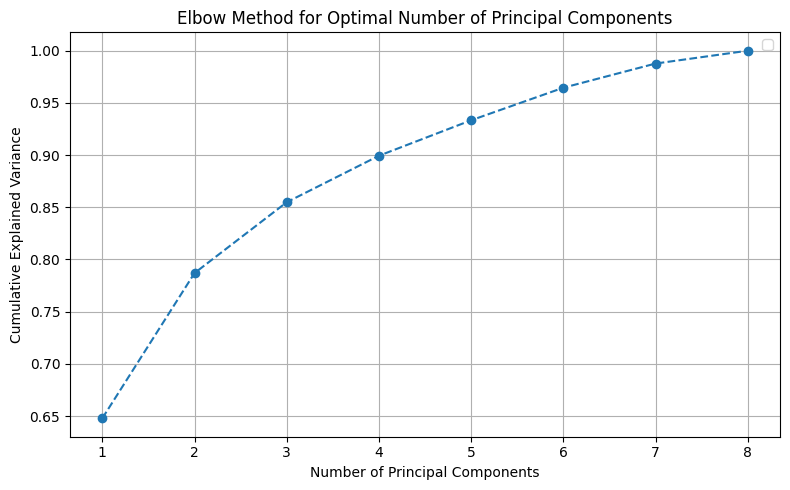

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Now we have an explained variance of almost 80% with 2 principal components. Much better!

In [44]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_cls_ext)
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_cls_ext.columns, index=['PC_1', 'PC_2'])
dataset_pca

,Aroma,Flavor,Acidity,Body,Balance,Aftertaste,Uniformity,Sweetness
PC_1,0.378843,0.410276,0.385560,0.370266,0.389912,0.405772,0.233073,0.177182
PC_2,0.123310,0.109933,0.120332,0.128360,0.090376,0.127390,0.606132,0.741593


Here is our principal components. We see that PC1 is weighted across all the features, with a dive in Uniformity and Sweetness, while PC2 is mostly weighted be these.

In [45]:
df_pca = pd.DataFrame(pca_2_result, columns=['PC_1', 'PC_2'])
df_pca.head()

,PC_1,PC_2
0,6.911071,-1.692308
1,6.403323,-1.539113
2,5.564199,-1.277258
3,5.403563,-1.239001
4,5.308205,-1.204755


<Axes: >

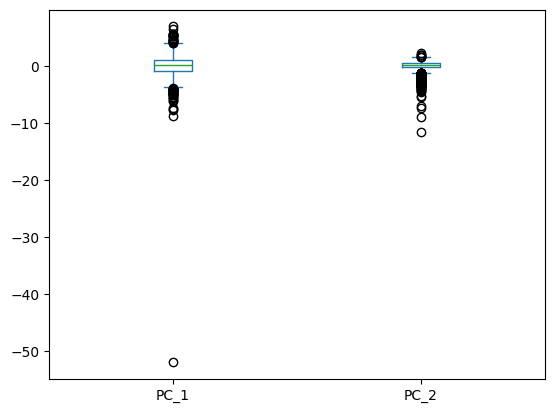

In [46]:
df_pca.plot.box()

We have also introduced some serious outliers. Lets remove them


In [47]:
z_scores = np.abs(zscore(df_pca))
df_pca = df_pca[(z_scores < 3).all(axis=1)]

<Axes: >

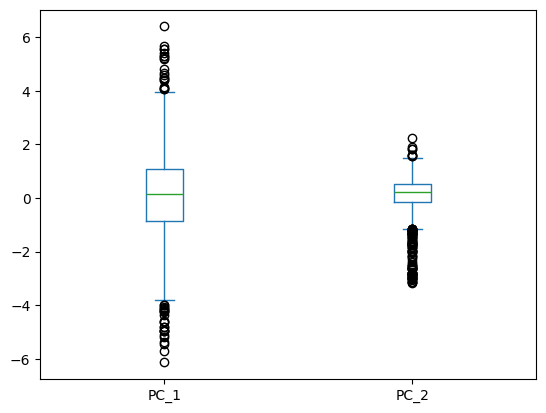

In [48]:
df_pca.plot.box()

/tmp/ipykernel_11257/519479020.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca['PC_1'], df_pca['PC_2'], s=50, cmap='viridis')
/tmp/ipykernel_11257/519479020.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


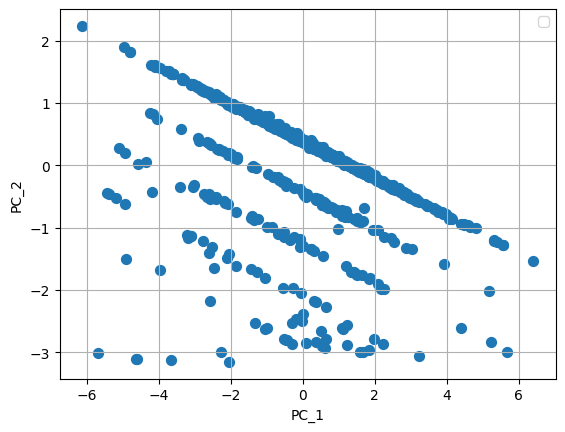

In [49]:
fig = plt.figure()
plt.scatter(df_pca['PC_1'], df_pca['PC_2'], s=50, cmap='viridis')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.grid(True)
plt.legend()
plt.show()

In [50]:
# Calculating optimal number of clusters in a K-means algorithm using silhouette score
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_pca)
    score = sk.metrics.silhouette_score(df_pca, model.labels_, metric='euclidean', sample_size=len(df_pca))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append([k, score])


Number of clusters = 2
Silhouette score = 0.47613541603149573

Number of clusters = 3
Silhouette score = 0.45264449296766734

Number of clusters = 4
Silhouette score = 0.42933865716674513

Number of clusters = 5
Silhouette score = 0.4650814679849461

Number of clusters = 6
Silhouette score = 0.44947974588769984

Number of clusters = 7
Silhouette score = 0.4621204698314718

Number of clusters = 8
Silhouette score = 0.4621910538972958

Number of clusters = 9
Silhouette score = 0.45461595121802156


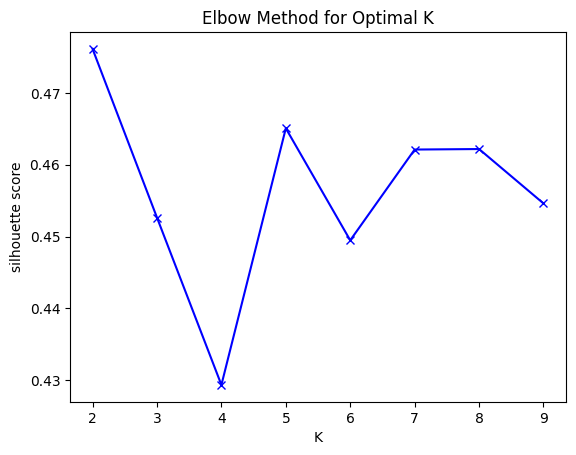

In [51]:
score_df = pd.DataFrame(scores, columns=['k', 'scores'])
fig = plt.figure()
plt.title('Elbow Method for Optimal K')
plt.plot(score_df.k, score_df.scores, 'bx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

Using silhouette score for each amount of clusters, we se that we achieve a maximum score of 0,473 on 2 clusters. Let's try and visualize them

In [52]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10) 
prediction = kmeans.fit_predict(df_pca)

/tmp/ipykernel_11257/3703295130.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


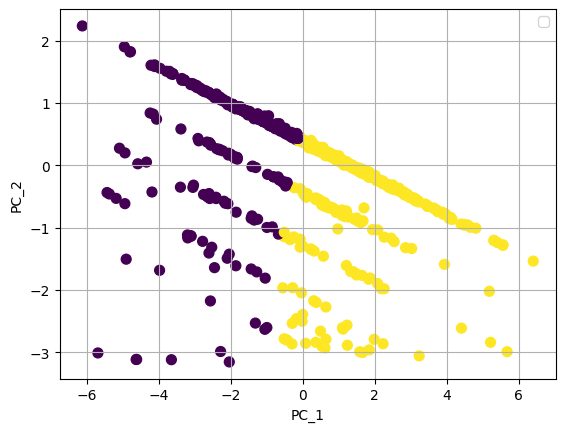

In [53]:
fig = plt.figure()
plt.scatter(df_pca['PC_1'], df_pca['PC_2'], c=prediction, s=50, cmap='viridis')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.grid(True)
plt.legend()
plt.show()

Well, its doesn't seem like the K-means algorithm finds anything any clusters that makes visual sense. Lets try to the PCA again with an additional PC. Maybe the extra 5% explained variance and dimension will add some insights

In [54]:
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(df_cls_ext)
dataset_pca = pd.DataFrame(abs(pca_3.components_), columns=df_cls_ext.columns, index=['PC_1', 'PC_2', 'PC_3'])
dataset_pca

,Aroma,Flavor,Acidity,Body,Balance,Aftertaste,Uniformity,Sweetness
PC_1,0.378843,0.410276,0.385560,0.370266,0.389912,0.405772,0.233073,0.177182
PC_2,0.123310,0.109933,0.120332,0.128360,0.090376,0.127390,0.606132,0.741593
PC_3,0.011229,0.006469,0.007465,0.181587,0.020895,0.025584,0.746999,0.638517


Here are our components. With PC1 weighted across most parameters, PC2 mostly weighted by Sweetness and Uniformity and PC3 weighted mainly by Uniformity

In [55]:
df_pca = pd.DataFrame(pca_3_result, columns=['PC_1', 'PC_2', 'PC_3'])
df_pca.head()

,PC_1,PC_2,PC_3
0,6.911071,-1.692308,-0.342964
1,6.403323,-1.539113,-0.311400
2,5.564199,-1.277258,-0.281795
3,5.403563,-1.239001,-0.362572
4,5.308205,-1.204755,-0.338706


<Axes: >

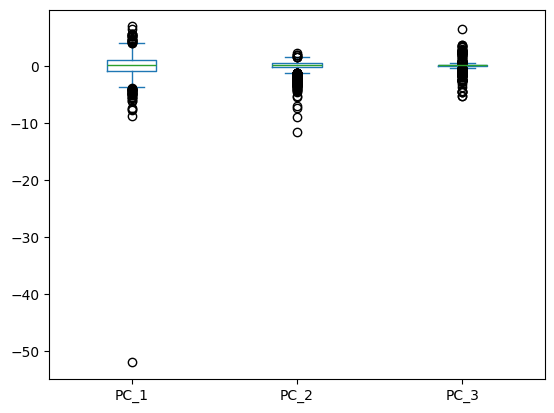

In [56]:
df_pca.plot.box()

In [57]:
z_scores = np.abs(zscore(df_pca))
df_pca = df_pca[(z_scores < 3).all(axis=1)]

<Axes: >

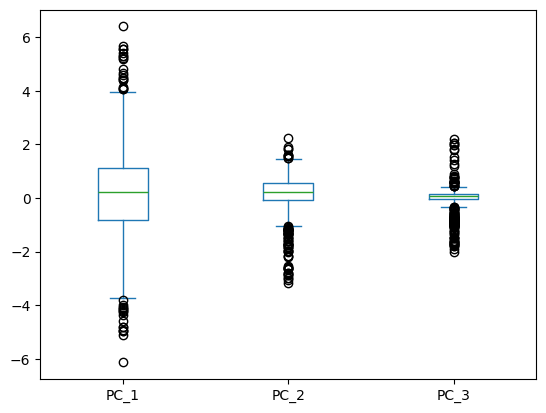

In [58]:
df_pca.plot.box()

Text(0.5, 0, 'PC 3')

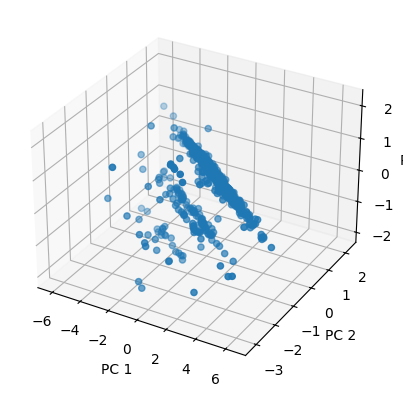

In [59]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

Here is our 3D points.
Let's start with doing doing a K-means clustering algorithm. First we need to find the optimal K (Number of clusters)

In [60]:
# Calculating optimal number of clusters in a K-means algorithm using silhouette score
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_pca)
    score = sk.metrics.silhouette_score(df_pca, model.labels_, metric='euclidean', sample_size=len(df_pca))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append([k, score])


Number of clusters = 2
Silhouette score = 0.466683995991562

Number of clusters = 3
Silhouette score = 0.44796288324081235

Number of clusters = 4
Silhouette score = 0.4246863439641892

Number of clusters = 5
Silhouette score = 0.3951869589085471

Number of clusters = 6
Silhouette score = 0.42963697556589764

Number of clusters = 7
Silhouette score = 0.4233756454211345

Number of clusters = 8
Silhouette score = 0.4392606058355029

Number of clusters = 9
Silhouette score = 0.43673146688928915


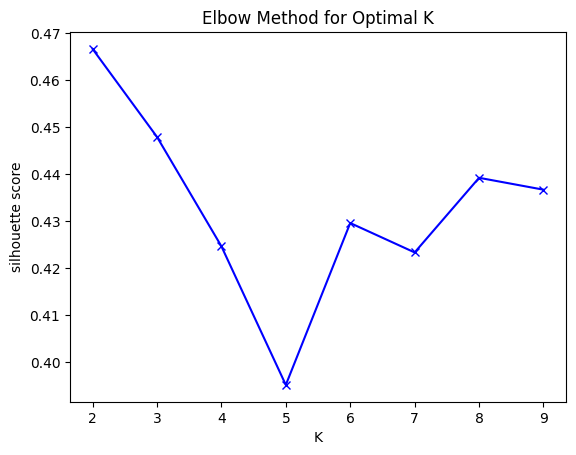

In [61]:
score_df = pd.DataFrame(scores, columns=['k', 'scores'])
fig = plt.figure()
plt.title('Elbow Method for Optimal K')
plt.plot(score_df.k, score_df.scores, 'bx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [62]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10) 
prediction = kmeans.fit_predict(df_pca)

In [63]:
prediction

array([0, 0, 0, ..., 0, 0, 1], shape=(1267,), dtype=int32)

Text(0.5, 0, 'PC 3')

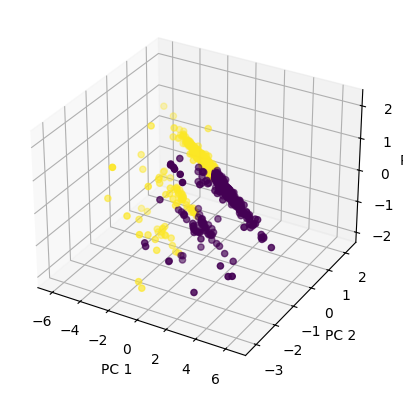

In [64]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=prediction)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

Well, the K-means method doesn't seem to agree with us. Lets try doing agglomerative clustering instead

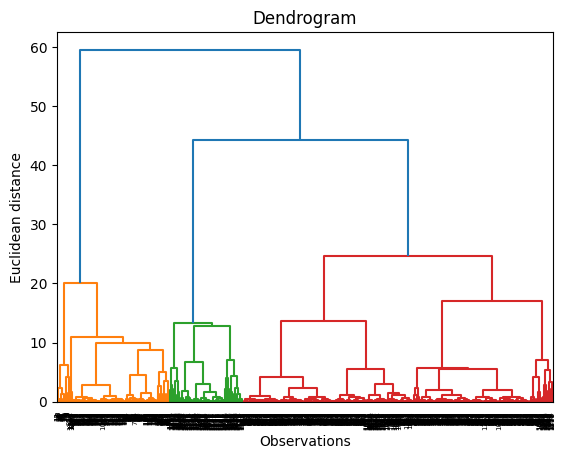

In [65]:
# Dendogram for agglomerative clustering
plt.figure()
dendogram = ch.dendrogram(ch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distance')
plt.show()

In [66]:
model = AgglomerativeClustering(2, linkage = 'ward')
aggmodel_pred = model.fit_predict(df_pca)

Text(0.5, 0, 'PC 3')

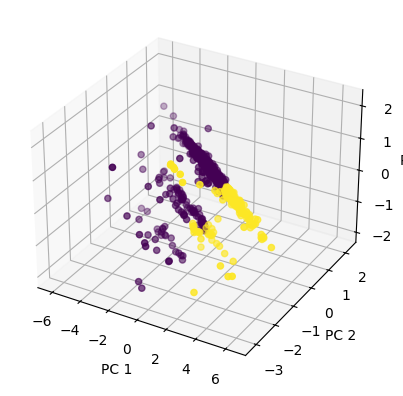

In [67]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=aggmodel_pred)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

Well that doesn't seem to agree either. Lets try running a DBSCAN

In [68]:
#DBSCAN for automatically determining amount of clusters
# Tried to play a little around with eps here
dbscan = DBSCAN(eps=0.6, min_samples=15)
dbscan_pred = dbscan.fit_predict(df_pca)
dbscan_pred

array([-1, -1, -1, ..., -1, -1, -1], shape=(1267,))

Text(0.5, 0, 'PC 3')

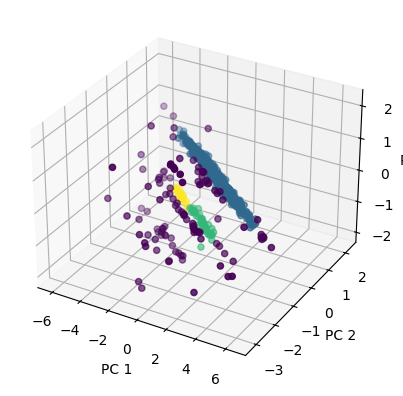

In [69]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=dbscan_pred)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

The DBSCAN clustering seems to yield the best results so far. There's a clear large cluster, showing the correlation between PC1 and PC2. To smaller cluster showing a concentration of data points in the same correlation between PC1 and PC2, but is offset on PC3. Showing 2 potential subcategories of data along the axis of PC3.

The rest of the datapoints is classified as outliters by the algorithm